<a href="https://colab.research.google.com/github/UdaraChamidu/Eye-Disease-Classification-With-Integrated-Chatbot/blob/main/EyeDiseaseClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Essential Librries

In [1]:
import numpy as np
import tensorflow as tf
from google.colab import drive



# Import dataset from Google Drive

In [2]:
# mount google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
main_folder_path = '/content/drive/MyDrive/dataset/'

In [4]:
import os

# List all files and subfolders
for root, dirs, files in os.walk(main_folder_path):
    print(f"Current directory: {root}")
    print(f"Subfolders: {dirs}")
    print(f"Files: {files}")
    print("--------------------------")


Current directory: /content/drive/MyDrive/dataset/
Subfolders: ['Dataset']
Files: []
--------------------------
Current directory: /content/drive/MyDrive/dataset/Dataset
Subfolders: ['ACRIMA', 'ORIGA', 'diabetic_retinopathy', 'cataract', 'ODIR-5K', 'normal', 'retina_disease', 'Glaucoma']
Files: []
--------------------------
Current directory: /content/drive/MyDrive/dataset/Dataset/ACRIMA
Subfolders: []
Files: ['Im004_ACRIMA.jpg', 'Im007_ACRIMA.jpg', 'Im003_ACRIMA.jpg', 'Im022_ACRIMA.jpg', 'Im001_ACRIMA.jpg', 'Im019_ACRIMA.jpg', 'Im005_ACRIMA.jpg', 'Im015_ACRIMA.jpg', 'Im021_ACRIMA.jpg', 'Im012_ACRIMA.jpg', 'Im026_ACRIMA.jpg', 'Im017_ACRIMA.jpg', 'Im018_ACRIMA.jpg', 'Im023_ACRIMA.jpg', 'Im014_ACRIMA.jpg', 'Im002_ACRIMA.jpg', 'Im029_ACRIMA.jpg', 'Im011_ACRIMA.jpg', 'Im025_ACRIMA.jpg', 'Im013_ACRIMA.jpg', 'Im016_ACRIMA.jpg', 'Im024_ACRIMA.jpg', 'Im030_ACRIMA.jpg', 'Im020_ACRIMA.jpg', 'Im010_ACRIMA.jpg', 'Im027_ACRIMA.jpg', 'Im028_ACRIMA.jpg', 'Im006_ACRIMA.jpg', 'Im009_ACRIMA.jpg', 'Im008

['2236_left.jpg', '2168_right.jpg', '2235_left.jpg', '2211_right.jpg', '_154_1054490.jpg', '691_left.jpg', '560_right.jpg', '2149_right.jpg', '2150_right.jpg', '2165_right.jpg', '2247_left.jpg', '2246_right.jpg', '_119_9887385.jpg', '_107_5060742.jpg', '_140_1534199.jpg', '2138_right.jpg', '_130_3561448.jpg', '2103_right.jpg', '2236_right.jpg', '2233_right.jpg', '24_right.jpg', '_152_8894820.jpg', '2134_left.jpg', '2208_right.jpg', '2183_left.jpg', '2162_right.jpg', '477_left.jpg', '2119_right.jpg', '2182_right.jpg', '1102_right.jpg', '_131_863673.jpg', '2156_left.jpg', '2184_left.jpg', '2151_left.jpg', '2158_right.jpg', '1144_right.jpg', '2282_right.jpg', '_160_9986895.jpg', '_156_6418009.jpg', '2117_left.jpg', '2108_right.jpg', '1083_left.jpg', '_123_8135331.jpg', '_112_3727502.jpg', '2136_left.jpg', '2237_right.jpg', '2141_right.jpg', '2195_left.jpg', '2239_right.jpg', '2197_right.jpg', '2124_left.jpg', '2110_left.jpg', '_114_5711178.jpg', '2240_right.jpg', '_147_3710804.jpg', '218_

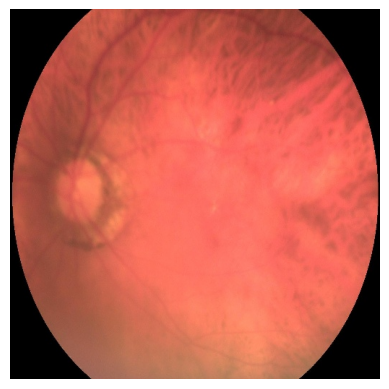

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

image_folder_path = '/content/drive/MyDrive/dataset/Dataset/cataract/'

# List all image files in the folder
image_files = [f for f in os.listdir(image_folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# print list of images
print(image_files)

# If there are images, display the first one
if image_files:
    # Get the path of the first image
    image_path = os.path.join(image_folder_path, image_files[0])

    # Open and display the image using PIL
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("No images found in the folder.")


# push codes to github

In [6]:
!pip install tensorflow
!pip install matplotlib

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


# Use ImageDataGenerator with validation_split

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset
dataset_dir = '/content/drive/MyDrive/dataset/Dataset'

# Set up ImageDataGenerators with validation_split
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)  # 20% for validation

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data (80% of data)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use subset for training (80%)
)

# Load validation data (20% of data)
validation_generator = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use subset for validation (20%)
)


Found 11074 images belonging to 8 classes.
Found 2766 images belonging to 8 classes.


In [9]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load ResNet50 as the base model with ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model (to prevent retraining)
base_model.trainable = False

# Define the model
model = models.Sequential([
    base_model,  # Add ResNet50 as a feature extractor
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Final layer with number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the Model

In [10]:
history = model.fit(
    train_generator,  # Training data
    steps_per_epoch=train_generator.samples // 32,  # Number of batches per epoch
    epochs=1,  # Number of epochs to train
    validation_data=validation_generator,  # Validation data
    validation_steps=validation_generator.samples // 32  # Number of batches for validation
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


346/346 ━━━━━━━━━━━━━━━━━━━━ 449s 1s/step - accuracy: 0.5682 - loss: 1.5492 - val_accuracy: 0.5789 - val_loss: 1.3620


# Evaluate the Model

In [11]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')


87/87 ━━━━━━━━━━━━━━━━━━━━ 66s 761ms/step - accuracy: 0.5833 - loss: 1.3527
Validation Accuracy: 57.95%


# Visualize Training and Validation Accuracy and Loss

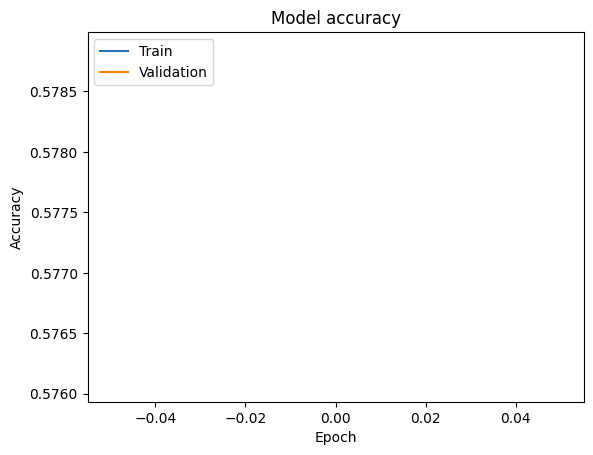

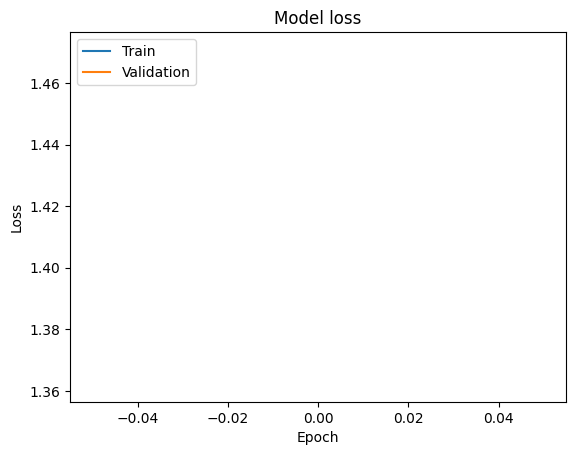

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Make Predictions

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image for prediction
img_path = '/content/drive/MyDrive/dataset/Dataset/cataract/_0_4015166.jpg'  # Change this to your test image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale the image

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted disease
class_names = list(train_generator.class_indices.keys())
print(f'Predicted Disease: {class_names[predicted_class[0]]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Disease: ODIR-5K


# Fine-Tuning (Optional)

In [15]:
# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
fine_tune_at = 100  # Fine-tune from layer 100 onward

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Re-compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model with fine-tuning
history_fine = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)



Epoch 1/5


KeyboardInterrupt: 